In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Colormap, ListedColormap
import seaborn as sns

In [2]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

X, y = make_classification(
    n_samples=200, n_features=2,
    n_informative=2, n_redundant=0,
    random_state=42
)


data = pd.DataFrame(np.hstack((X, y.reshape(-1, 1))),
                    columns=['x1', 'x2', 'y'])

__Задание 1.__

Обучите решающее дерево с параметрами по умолчанию, предварительно разбив выборку на обучающую и тестовую. Постройте разделяющую поверхность на трейне (для этого воспользуйтесь функцией `plot_surface`, пример ниже). Посчитайте accuracy на обучающей и тестовой выборках. Сильно ли деревья переобучились? (2б)

In [3]:
def plot_surface(clf, X, y):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
                edgecolors=np.array(palette)[y], linewidths=2)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

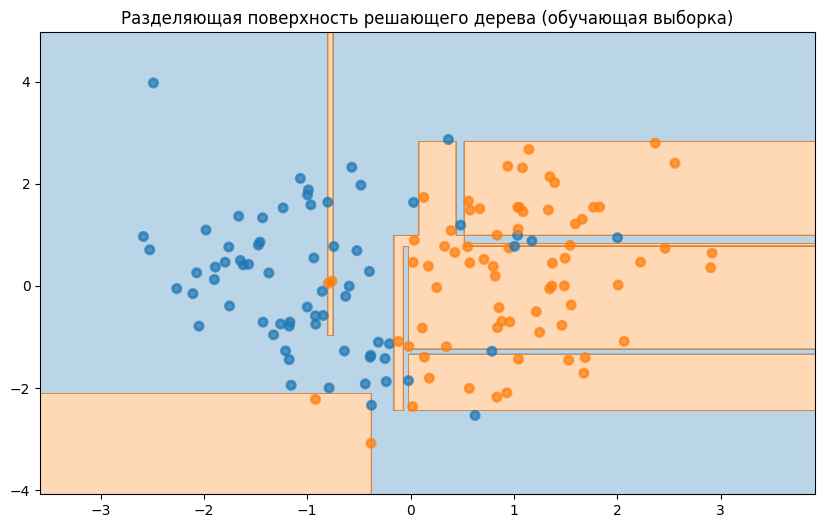

Accuracy на обучающей выборке: 1.000
Accuracy на тестовой выборке: 0.800
Дерево сильно переобучилось!


In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

### Your code is here

# 2. Обучение решающего дерева с параметрами по умолчанию
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)

# 3. Построение разделяющей поверхности на обучающей выборке
plt.figure(figsize=(10, 6))
plot_surface(tree, X_train, y_train)
plt.title("Разделяющая поверхность решающего дерева (обучающая выборка)")
plt.show()

# 4. Расчет accuracy на обеих выборках
train_accuracy = accuracy_score(y_train, tree.predict(X_train))
test_accuracy = accuracy_score(y_test, tree.predict(X_test))

print(f"Accuracy на обучающей выборке: {train_accuracy:.3f}")
print(f"Accuracy на тестовой выборке: {test_accuracy:.3f}")

# 5. Анализ переобучения
if train_accuracy > 0.95 and (train_accuracy - test_accuracy) > 0.1:
    print("Дерево сильно переобучилось!")
elif (train_accuracy - test_accuracy) > 0.05:
    print("Есть умеренное переобучение")
else:
    print("Переобучение минимальное или отсутствует")


__Задание 2.__

Переберите несколько параметров для регуляризации (`max_depth`, `min_samples_leaf`) из предложенных. Для каждого набора гиперпараметров постройте разделяющую поверхность, выведите обучающую и тестовую ошибки. Используйте, если хотите, функцию ниже. Как изменение параметров влияет на поверхность? При каких параметрах на тесте достигается лучшее качество? А на трейне? (2б).

In [6]:
def plot_surface_axes(clf, X, y, ax, train_acc, test_acc):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
    edgecolors=np.array(palette)[y], linewidths=2)
    
    ax.plot([], [], label = 'train_acc : %0.5f' % train_acc)
    ax.plot([], [], label = 'test_acc : %0.5f' % test_acc)
    
    plt.legend(loc = 'lower right', prop={'size': 20})

In [7]:
max_depth_set = [6, 7, 8, 9, 12]

min_samples_leaf_set = [3, 5, 7, 10]

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2,
                                                    random_state = 42) 

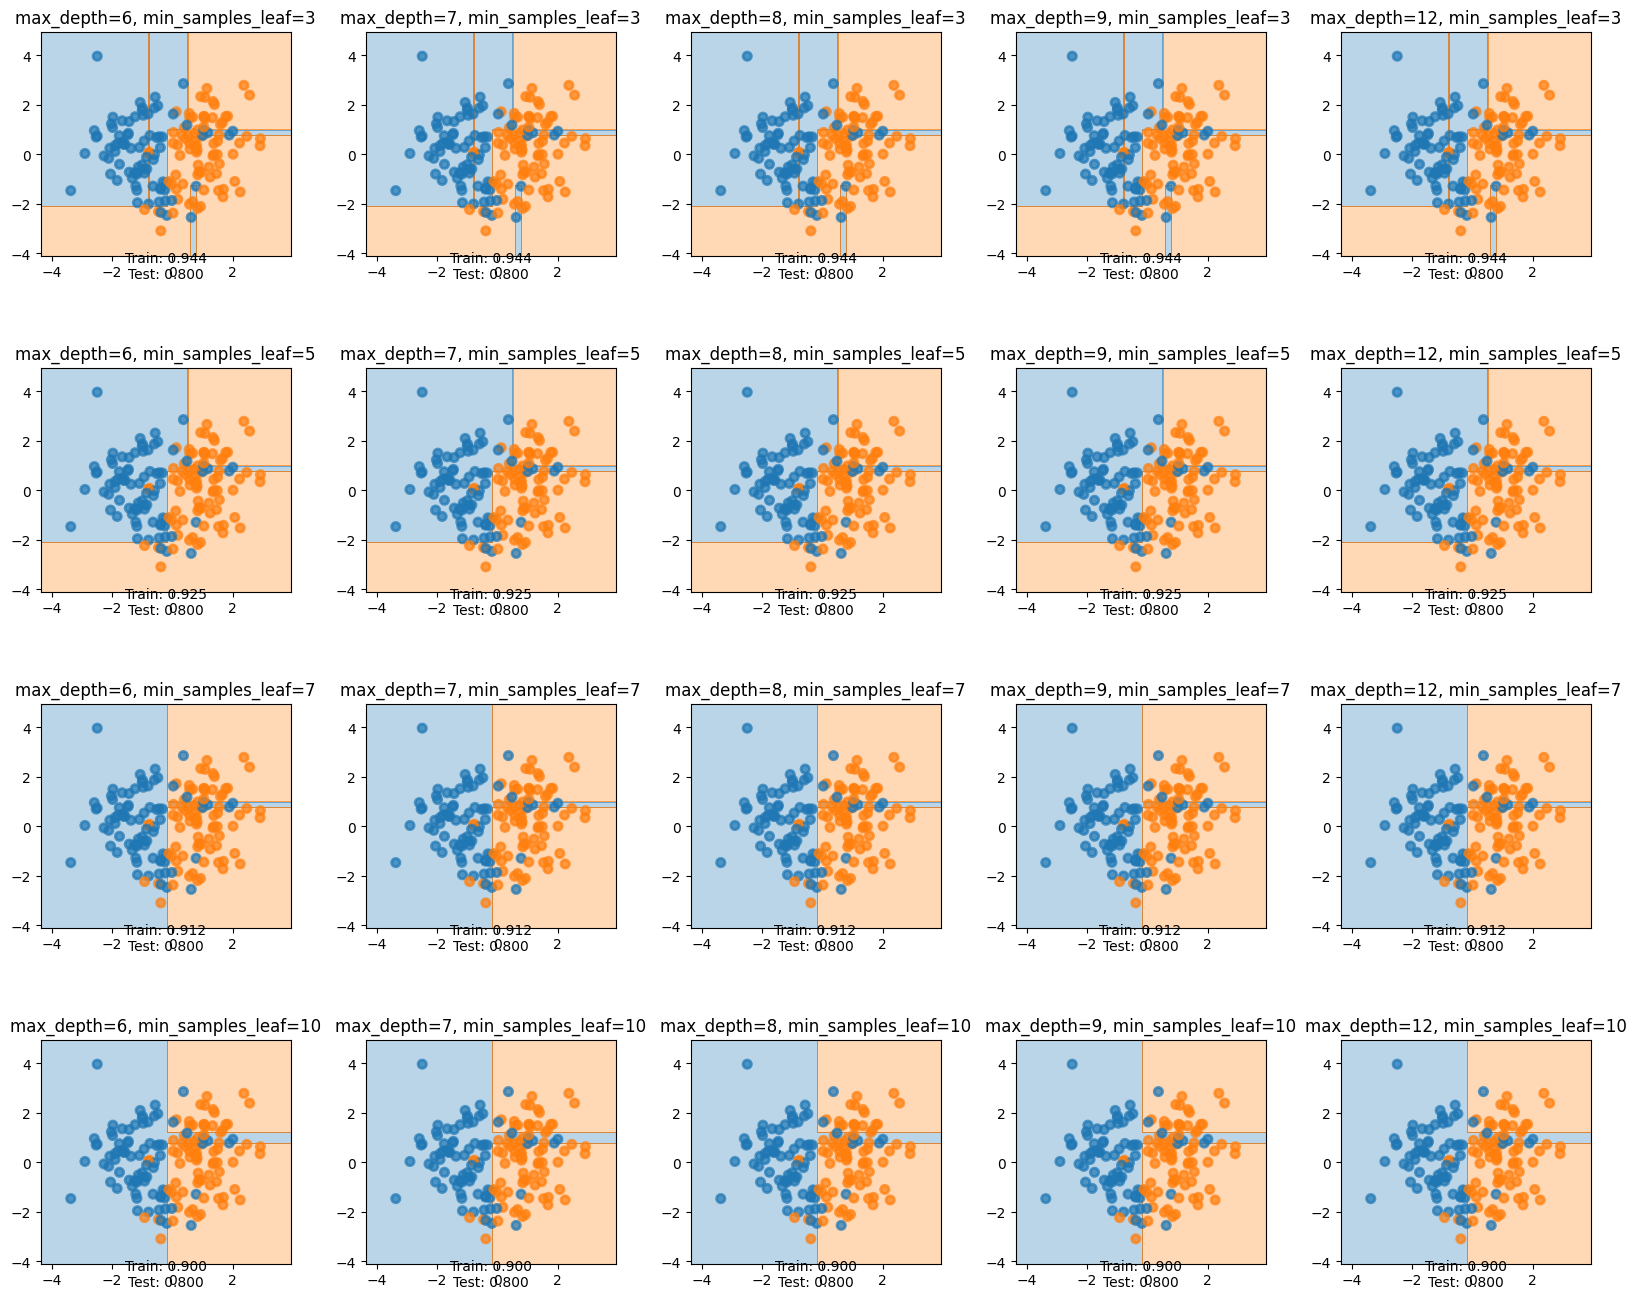

Лучшие параметры:
max_depth = 6
min_samples_leaf = 3
Accuracy на обучении: 0.944
Accuracy на тесте: 0.800


In [6]:
### Your code is here

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Функция для визуализации с осями
def plot_surface_axes(clf, X, y, ax, train_acc, test_acc):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = ax.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
               edgecolors=np.array(palette)[y], linewidths=2)
    
    ax.set_title(f'max_depth={clf.max_depth}, min_samples_leaf={clf.min_samples_leaf}')
    ax.text(0.5, -0.1, f'Train: {train_acc:.3f}\nTest: {test_acc:.3f}', 
            transform=ax.transAxes, ha='center')

# Разделение данных
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Сетка параметров
max_depth_set = [6, 7, 8, 9, 12]
min_samples_leaf_set = [3, 5, 7, 10]

# Создаем фигуру для графиков
fig, axes = plt.subplots(len(min_samples_leaf_set), len(max_depth_set), 
                        figsize=(20, 16))
plt.subplots_adjust(hspace=0.5, wspace=0.3)

best_test_acc = 0
best_params = {}

# Перебор параметров
for i, min_samples_leaf in enumerate(min_samples_leaf_set):
    for j, max_depth in enumerate(max_depth_set):
        # Обучение модели
        tree = DecisionTreeClassifier(max_depth=max_depth, 
                                    min_samples_leaf=min_samples_leaf,
                                    random_state=42)
        tree.fit(X_train, y_train)
        
        # Оценка качества
        train_acc = accuracy_score(y_train, tree.predict(X_train))
        test_acc = accuracy_score(y_test, tree.predict(X_test))
        
        # Визуализация
        plot_surface_axes(tree, X_train, y_train, axes[i,j], train_acc, test_acc)
        
        # Сохранение лучших параметров
        if test_acc > best_test_acc:
            best_test_acc = test_acc
            best_params = {'max_depth': max_depth, 
                          'min_samples_leaf': min_samples_leaf,
                          'train_acc': train_acc,
                          'test_acc': test_acc}

plt.show()

# Вывод лучших параметров
print("Лучшие параметры:")
print(f"max_depth = {best_params['max_depth']}")
print(f"min_samples_leaf = {best_params['min_samples_leaf']}")
print(f"Accuracy на обучении: {best_params['train_acc']:.3f}")
print(f"Accuracy на тесте: {best_params['test_acc']:.3f}")

__Задание 3.__

Добавим признак $2\cdot x_1 - x_2$, транформацию добавим как шаг пайплайна. С помощью данного класса (из практики/лекции) обучите дерево с максимальной глубиной=3, нарисуйте поверхность на трейне, посчитайте accuracy (2 б)

In [8]:
from sklearn.base import BaseEstimator, TransformerMixin

class CustomFunctionTransformer(BaseEstimator, TransformerMixin):
    
    def __init__(self, first_col, second_col, function):
        self.first_col = first_col
        self.second_col = second_col
        self.function = function
        print("Инициализировали класс!")
        
    def fit(self, X, y=None):
        print("Зафитили датасет!")
        return self
    
    def transform(self, X, y=None):
        
        X_ = X.copy()
        X_['new_feature'] = self.function(X_[self.first_col], X_[self.second_col])
        X_ = X_.drop([self.first_col, self.second_col], axis=1)
        
        print("Трансформировали датасет!")
        return X_

In [9]:
X_train = pd.DataFrame(X_train, columns=['x1', 'x2'])
X_test = pd.DataFrame(X_test, columns=['x1', 'x2'])

In [11]:
from sklearn.pipeline import Pipeline

### Your code is here





In [10]:
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Определяем функцию для нового признака
def custom_function(x1, x2):
    return 2*x1 - x2

# Создаем пайплайн
pipeline = Pipeline([
    ('transformer', CustomFunctionTransformer(first_col='x1', 
                                            second_col='x2', 
                                            function=custom_function)),
    ('classifier', DecisionTreeClassifier(max_depth=3, random_state=42))
])

# Обучение пайплайна
pipeline.fit(X_train, y_train)

# Предсказания и оценка accuracy
train_pred = pipeline.predict(X_train)
test_pred = pipeline.predict(X_test)

train_acc = accuracy_score(y_train, train_pred)
test_acc = accuracy_score(y_test, test_pred)

print(f"Accuracy на обучающей выборке: {train_acc:.3f}")
print(f"Accuracy на тестовой выборке: {test_acc:.3f}")

# Визуализация разделяющей поверхности
plt.figure(figsize=(10, 6))

# Для визуализации нужно преобразовать данные через наш пайплайн
X_transformed = pipeline.named_steps['transformer'].transform(X_train.copy())
tree_model = pipeline.named_steps['classifier']

# Создаем сетку для визуализации
plot_step = 0.01
x_min, x_max = X_transformed.iloc[:, 0].min() - 1, X_transformed.iloc[:, 0].max() + 1
y_min, y_max = X_transformed.iloc[:, 1].min() - 1, X_transformed.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))

# Предсказания для сетки
Z = tree_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Визуализация
palette = sns.color_palette(n_colors=len(np.unique(y_train)))
cmap = ListedColormap(palette)
plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)
plt.scatter(X_transformed.iloc[:, 0], X_transformed.iloc[:, 1], 
            c=y_train, cmap=cmap, alpha=.7,
            edgecolors=np.array(palette)[y_train], linewidths=2)
plt.title(f"Разделяющая поверхность (max_depth=3)\nTrain accuracy: {train_acc:.3f}, Test accuracy: {test_acc:.3f}")
plt.xlabel('Новый признак: 2*x1 - x2')
plt.ylabel('Оставшийся признак')
plt.show()

Инициализировали класс!
Зафитили датасет!
Трансформировали датасет!
Трансформировали датасет!
Трансформировали датасет!
Accuracy на обучающей выборке: 0.863
Accuracy на тестовой выборке: 0.750
Трансформировали датасет!


IndexError: single positional indexer is out-of-bounds

<Figure size 1000x600 with 0 Axes>